# Genocide in Gaza: Telling the Story through Data Science!

In [3]:
# Uncomment and Install the below packages, if not yet done.
# ! pip install pdfplumber
# ! pip install arabic_reshaper
# ! pip install python-bidi

In [1]:
# Run this cell to set up the notebook.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

## 1. Preprocessing 

### 1.A Converting the PDF list in the "killed-in-gaza_moh_2024-09-21.pdf" file to CSV.



In [3]:
import pdfplumber
import csv
import arabic_reshaper
from bidi.algorithm import get_display

*Note: Run the below cell only once for the first time, it might take some time to create the CSV file

In [5]:
base_dataset_dir = "datasets/"

In [9]:
def fix_arabic(text):
    if text:
        #v1
        # reshaped_text = arabic_reshaper.reshape(text)
        # return get_display(reshaped_text);
        # v2
        # reshaped_text = get_display(text)
        # arabic_text = arabic_reshaper.reshape(reshaped_text)
        # return arabic_text;
        return get_display(text);
    return text

with pdfplumber.open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.pdf") as pdf:
    with open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.csv", "w", newline="", encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        for page in pdf.pages:
            table = page.extract_table()
            if table:
                for row in table:
                    # Fix only the Arabic column (column index 2)
                    fixed_row = [];
                    for i, cell in enumerate(row):
                        if i == 2:
                            fixed_row.append(fix_arabic(cell))
                        else:
                            fixed_row.append(cell)
                    writer.writerow(fixed_row);

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

### 1.B Converting the JSON list in the "infrastructure-damaged.json" file to CSV.

In [29]:
import json
import csv
with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
    data = json.load(f)
    with open(base_dataset_dir+"infrastructure-damaged.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(data[0].keys())
        for item in data:
            writer.writerow(item.values())
    print("CSV file created successfully.")


CSV file created successfully.


In [31]:
import csv
import json

input_csv_file = base_dataset_dir+"infrastructure-damaged.csv"
output_csv_file = base_dataset_dir+"infrastructure-damaged_fixed.csv"

def fix_data(input_file, output_file):
    with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
        data = json.load(f)

    all_keys = {
        "report_date",
        "civic_buildings",
        "educational_buildings",
        "places_of_worship",
        "residential",
    }

    civic_keys = {"destroyed", "ext_destroyed"}
    educational_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}
    worship_keys = {
        "mosques_destroyed",
        "ext_mosques_destroyed",
        "mosques_damaged",
        "ext_mosques_damaged",
        "churches_destroyed",
        "ext_churches_destroyed",
    }
    residential_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}

    with open(output_file, "w", newline="") as f:
        writer = csv.writer(f)

        header = [
            "report_date",
            "civic_destroyed",
            "civic_ext_destroyed",
            "edu_destroyed",
            "edu_ext_destroyed",
            "edu_damaged",
            "edu_ext_damaged",
            "worship_mosques_destroyed",
            "worship_ext_mosques_destroyed",
            "worship_mosques_damaged",
            "worship_ext_mosques_damaged",
            "worship_churches_destroyed",
            "worship_ext_churches_destroyed",
            "residential_destroyed",
            "residential_ext_destroyed",
            "residential_damaged",
            "residential_ext_damaged",
        ]
        writer.writerow(header)

        # Process each item in the JSON data
        for item in data:
            report_date = item.get("report_date", "")

            civic = item.get("civic_buildings", {})
            civic_destroyed = civic.get("destroyed", 0)
            civic_ext_destroyed = civic.get("ext_destroyed", 0)

            edu = item.get("educational_buildings", {})
            edu_destroyed = edu.get("destroyed", 0)
            edu_ext_destroyed = edu.get("ext_destroyed", 0)
            edu_damaged = edu.get("damaged", 0)
            edu_ext_damaged = edu.get("ext_damaged", 0)

            worship = item.get("places_of_worship", {})
            worship_mosques_destroyed = worship.get("mosques_destroyed", 0)
            worship_ext_mosques_destroyed = worship.get("ext_mosques_destroyed", 0)
            worship_mosques_damaged = worship.get("mosques_damaged", 0)
            worship_ext_mosques_damaged = worship.get("ext_mosques_damaged", 0)
            worship_churches_destroyed = worship.get("churches_destroyed", 0)
            worship_ext_churches_destroyed = worship.get("ext_churches_destroyed", 0)

            residential = item.get("residential", {})
            residential_destroyed = residential.get("destroyed", 0)
            residential_ext_destroyed = residential.get("ext_destroyed", 0)
            residential_damaged = residential.get("damaged", 0)
            residential_ext_damaged = residential.get("ext_damaged", 0)

            row = [
                report_date,
                civic_destroyed,
                civic_ext_destroyed,
                edu_destroyed,
                edu_ext_destroyed,
                edu_damaged,
                edu_ext_damaged,
                worship_mosques_destroyed,
                worship_ext_mosques_destroyed,
                worship_mosques_damaged,
                worship_ext_mosques_damaged,
                worship_churches_destroyed,
                worship_ext_churches_destroyed,
                residential_destroyed,
                residential_ext_destroyed,
                residential_damaged,
                residential_ext_damaged,
            ]
            writer.writerow(row)

    print(f"CSV file '{output_file}' created successfully.")


fix_data(input_csv_file, output_csv_file)

CSV file 'datasets/infrastructure-damaged_fixed.csv' created successfully.


## 2. Exploratory Analysis & Visualization 

In [13]:
killed_in_gaza = Table.read_table(base_dataset_dir+'killed-in-gaza_moh_2025-03-23.csv')
killed_in_gaza.show(5)

Index,Name,ا#سم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,2022-12-22,0,m,445808546


In [14]:
infrastructure = Table.read_table(base_dataset_dir+'infrastructure-damaged_fixed.csv')
infrastructure.show(5)

report_date,civic_destroyed,civic_ext_destroyed,edu_destroyed,edu_ext_destroyed,edu_damaged,edu_ext_damaged,worship_mosques_destroyed,worship_ext_mosques_destroyed,worship_mosques_damaged,worship_ext_mosques_damaged,worship_churches_destroyed,worship_ext_churches_destroyed,residential_destroyed,residential_ext_destroyed,residential_damaged,residential_ext_damaged
2023-10-07,0,5,0,1,0,15,0,2,0,4,0,0,0,80,0,0
2023-10-08,0,11,0,1,0,30,0,4,0,8,0,0,159,159,0,0
2023-10-09,0,16,0,2,0,45,0,6,0,12,0,0,790,790,0,0
2023-10-10,0,22,0,2,0,60,0,8,0,17,0,0,1009,1009,0,0
2023-10-11,27,27,3,3,75,75,10,10,0,21,0,0,2835,2835,0,0


In [17]:
# Daily casualities in Gaza
gaza_casualties = Table.read_table(base_dataset_dir+'casualties_daily_gaza_2025-04-12.csv')
gaza_casualties.show(5);

report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6,6,1,1
2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,nan,6,1,1
2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6,6,3,3
2023-10-10,mohtel,24,8,340,900,340,900,260,230,4000,1729,4000,0,nan,6,7,7
2023-10-11,gmotel,24,23,200,1100,200,1100,398,230,5184,1184,5184,0,10,10,nan,7


In [19]:
# Daily casualities in West Bank
westbank_casualties = Table.read_table(base_dataset_dir+'casualties_daily_west_bank_2025-04-12.csv')
westbank_casualties.show(5);

report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
2023-10-07,6,6,197,197,2,2,31,31,3,0,23,1,3,un
2023-10-08,8,14,127,324,3,5,7,38,13,1,194,1,9,un
2023-10-09,4,18,88,412,0,5,19,57,15,3,295,34,19,un
2023-10-10,5,23,72,484,0,5,7,64,19,3,332,39,29,un
2023-10-11,6,29,85,569,2,7,17,81,26,3,427,62,39,un


# A Timeline comparing data from flash and UN verified reports on cumulative number of killed individuals in West Bank

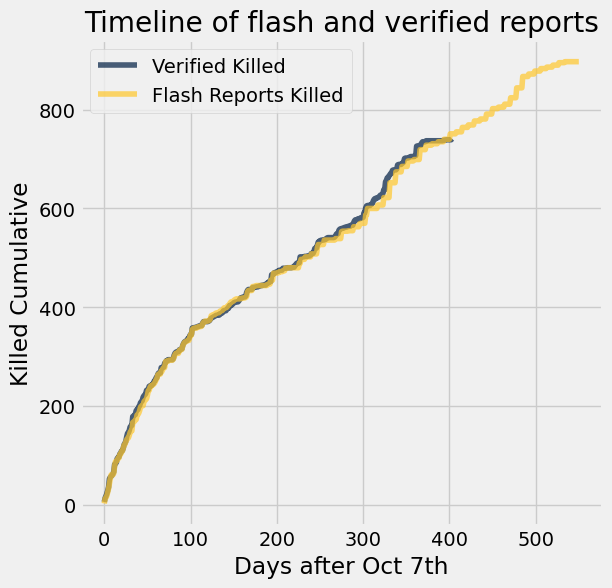

In [194]:
westbank_casualties = westbank_casualties.with_column("Days after Oct 7th", np.arange(0, westbank_casualties.num_rows))
wc_timeline = westbank_casualties.select("verified.killed_cum", "killed_cum", "Days after Oct 7th")
wc_timeline.plot("Days after Oct 7th")
plt.legend(["Verified Killed", "Flash Reports Killed"])
plt.title("Timeline of flash and verified reports")
plt.ylabel("Killed Cumulative")
plt.show()

In [196]:
# Last verified report
no_nan_westbank_casualties = westbank_casualties.where(~np.isnan(westbank_casualties.column("verified.killed_cum")))
no_nan_westbank_casualties.take(no_nan_westbank_casualties.num_rows-1).row(0).item(0)

'2024-11-13'

In [198]:
# Last flash update report
westbank_casualties.take(westbank_casualties.num_rows-1).row(0).item(0)

'2025-04-09'

### Insights gained from the two line graphs
* The verified line (blue line) and flash reports line (red line) are overlapping most of the time throughout the graph. This shows high reliability of flash reports, even before verification. With the flash report line being able to closely track with the verification line allows policy-makers, analysts, or journalist to reasonably and confidently rely on flash reports data without final verification from the UN and perform the necessasry humanitarian aid or political response to the West Bank immediately. Furthermore, having these two lines graph being close to each other shows that there are little bias or exaggeration from the flash reports clearly presenting the evidence of the violence and injustice the Israel army are committing.

* We can't really tell how fast the verification process is. However, it seems like from the graph the last verification from the UN and the latest flash report are far apart. The last verification was reported on **2024-11-13** meaning that the verified reports are lagging almost 5 months behind with the latest flash update reported at **2025-04-09**. Because we do not have data in regards to the delay of the verification report with respect to the flash report. We can assume two scenarios:
   1. That this is indeed a slow and thorough verification process probably to ensure accurate verified data are given out before being publicized.
   2. Due to increasing violence by Israel, the UN field staff are restricted to enter certain refugee camps and towns that are in conflict zones **OR** as violence continues which results in a chaotic and hectic environment, the field staff may feel overwhelmed and some may get caught in the crossfire reducing the number of staff to create reports.

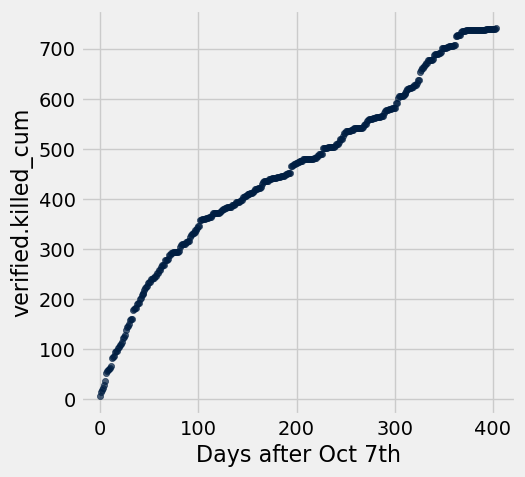

In [211]:
westbank_casualties.scatter("Days after Oct 7th", "verified.killed_cum")
plt.show()